In [160]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [161]:
cd /content/drive/MyDrive/DeepLearning/DeepLearning01

/content/drive/MyDrive/DeepLearning/DeepLearning01


In [162]:
dir = "/content/drive/MyDrive/DeepLearning/DeepLearning01/Sheykh-Recognition"

width = 224
height = 224

In [163]:
data_generator = ImageDataGenerator(
    rescale = 1 / 255,
    validation_split = 0.2,
)

train_data = data_generator.flow_from_directory(
    dir,
    target_size = (width, height),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)

validation_data = data_generator.flow_from_directory(
    dir,
    target_size = (width, height),
    batch_size = 4,
    class_mode = 'categorical',
    subset = 'validation'
)


Found 125 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [168]:
input_shape = (224, 224, 3)

model = tf.keras.models.Sequential([
         Conv2D(16, (3, 3), input_shape=input_shape, activation='relu'),
         Conv2D(16, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(32, (3, 3), activation='relu'),
         Conv2D(32, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(32, (3, 3), activation='relu'),
         Conv2D(32, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(64, (3, 3), activation='relu'),
         Conv2D(64, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Flatten(),
         Dense(128, activation='relu'),
         Dense(64, activation='relu'),
         Dense(2, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics='accuracy')

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_244 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_245 (Conv2D)          (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_120 (MaxPoolin (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_246 (Conv2D)          (None, 108, 108, 32)      4640      
_________________________________________________________________
conv2d_247 (Conv2D)          (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_248 (Conv2D)          (None, 51, 51, 32)      

In [169]:
history = model.fit(train_data, validation_data = validation_data, epochs=50)

Epoch 1/50
16/16 [==============================] - 3s 153ms/step - loss: 0.6935 - accuracy: 0.4960 - val_loss: 0.6926 - val_accuracy: 0.5333
Epoch 2/50
16/16 [==============================] - 2s 143ms/step - loss: 0.6930 - accuracy: 0.5360 - val_loss: 0.6924 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 2s 145ms/step - loss: 0.6928 - accuracy: 0.5200 - val_loss: 0.6924 - val_accuracy: 0.6333
Epoch 4/50
16/16 [==============================] - 2s 143ms/step - loss: 0.6926 - accuracy: 0.5520 - val_loss: 0.6923 - val_accuracy: 0.7333
Epoch 5/50
16/16 [==============================] - 2s 145ms/step - loss: 0.6924 - accuracy: 0.5680 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 6/50
16/16 [==============================] - 2s 137ms/step - loss: 0.6923 - accuracy: 0.5920 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 7/50
16/16 [==============================] - 2s 140ms/step - loss: 0.6918 - accuracy: 0.5200 - val_loss: 0.6920 - val_accuracy: 0.7667
Epoch 

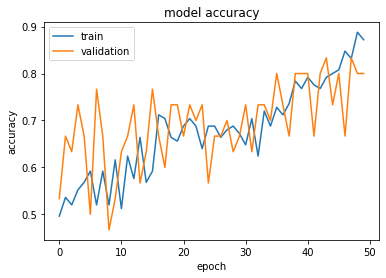

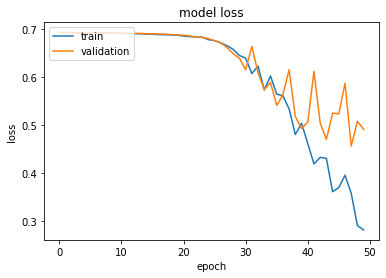

In [170]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [124]:
model.save('model.h5')